<a href="https://colab.research.google.com/github/mckay-moulton/INTEX2ML/blob/main/INTEX_V_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# I bought/subscribed to Collab Pro, so this code makes sure I'm connected to the upgraded RAM instance
# Expected output: 
    #"Your runtime has 37.8 gigabytes of available RAM
    #You are using a high-RAM runtime!""
    
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

import pandas as pd
pd.set_option('max_rows', 99999)

Your runtime has 37.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [14]:
# ___________________________FUNCTIONS______________________________
# Note 1: Only functions useful for developing a categorical model are used here
# Note 2: BINNING function removed, done manually later

def get_data(url, drop=[]):
  import pandas as pd
  df = pd.read_csv(url)
  if len(drop) > 0:
    for col in drop:
      df.drop(columns=[col], inplace=True)
  return df

def fs_variance(df, label="", p=0.9):
  from sklearn.feature_selection import VarianceThreshold
  import pandas as pd

  if label != "":
    X = df.drop(columns=[label])
    
  sel = VarianceThreshold(threshold=(p * (1 - p)))
  sel.fit_transform(X)

  # Add the label back in after removing poor features
  return df[sel.get_feature_names_out()].join(df[label])

#----------------Notice---------------------------
# The following function has been edited to only run one model (with several iterations)
# However, the other models have been eliminated due to one of the following reasons: 
# a) it didn't run at all (memory leak issues)
# b) it ran very slowly without any obvious advantages
# c) it gave us the heebie-jeebies to an alarming degree

# we ran several different variations of parameters with no clear increase in accuracy, 
# so the fianl parameters are the defaults listed here

def fit_crossvalidate_clf(df, label, k=10, r=5, repeat=True):
  import sklearn.linear_model as lm, pandas as pd, sklearn.ensemble as se, numpy as np
  from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
  from numpy import mean, std
  from sklearn import svm
  from sklearn import gaussian_process
  from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
  from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
  from sklearn import svm
  from sklearn.naive_bayes import CategoricalNB
  from xgboost import XGBClassifier
  from sklearn import preprocessing
  from sklearn.neural_network import MLPClassifier

  X = df.drop(columns=[label])
  y = df[label]

  if repeat:
    cv = RepeatedKFold(n_splits=k, n_repeats=r, random_state=12345)
  else:
    cv = KFold(n_splits=k, random_state=12345, shuffle=True)

  fit = {}    # Use this to store each of the fit metrics
  models = {} # Use this to store each of the models

  # Create the model objects
  # model_log = lm.LogisticRegression(max_iter=100)
  # model_logcv = lm.RidgeClassifier()
  # model_sgd = lm.SGDClassifier(max_iter=1000, tol=1e-3)
  # model_pa = lm.PassiveAggressiveClassifier(max_iter=1000, random_state=12345, tol=1e-3)
  # model_per = lm.Perceptron(fit_intercept=False, max_iter=10, tol=None, shuffle=False)
  # model_knn = KNeighborsClassifier(n_neighbors=3)
  # model_svm = svm.SVC(decision_function_shape='ovo') # Remove the parameter for two-class model
  # model_nb = CategoricalNB()
  # model_bag = se.BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
  # model_ada = se.AdaBoostClassifier(n_estimators=100, random_state=12345)
  # model_ext = se.ExtraTreesClassifier(n_estimators=100, random_state=12345)
  # model_rf = se.RandomForestClassifier(n_estimators=10)
  model_hgb = se.HistGradientBoostingClassifier(max_iter=100)  #THE CHOSEN ONE
  # model_vot = se.VotingClassifier(estimators=[('lr', model_log), ('rf', model_ext), ('gnb', model_hgb)], voting='hard')
  # model_gb = se.GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
  # estimators = [('ridge', lm.RidgeCV()), ('lasso', lm.LassoCV(random_state=12345)), ('knr', KNeighborsRegressor(n_neighbors=20, metric='euclidean'))]
  # final_estimator = se.GradientBoostingRegressor(n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1, random_state=12345)
  # model_gb = se.GradientBoostingRegressor(n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1, random_state=12345)
  # model_st = se.StackingRegressor(estimators=estimators, final_estimator=final_estimator)
  # model_xgb = XGBClassifier()
  # model_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=12345)

  # Fit a cross-validated R squared score and add it to the dict

  # fit['Logistic'] = mean(cross_val_score(model_log, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  # fit['Ridge'] = mean(cross_val_score(model_logcv, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  # fit['SGD'] = mean(cross_val_score(model_sgd, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  # fit['PassiveAggressive'] = mean(cross_val_score(model_pa, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  # fit['Perceptron'] = mean(cross_val_score(model_per, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  # fit['KNN'] = mean(cross_val_score(model_knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  # fit['SVM'] = mean(cross_val_score(model_svm, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  # fit['NaiveBayes'] = mean(cross_val_score(model_nb, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  # fit['Bagging'] = mean(cross_val_score(model_bag, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  # fit['AdaBoost'] = mean(cross_val_score(model_ada, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  # fit['ExtraTrees'] = mean(cross_val_score(model_ext, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  # fit['RandomForest'] = mean(cross_val_score(model_rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  fit['HistGradient'] = mean(cross_val_score(model_hgb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)) # this is new: min_samples_leaf= 30 (default20),
  # fit['Voting'] = mean(cross_val_score(model_vot, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  # fit['GradBoost'] = mean(cross_val_score(final_estimator, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  # fit['XGBoost'] = mean(cross_val_score(model_xgb, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
  # fit['NeuralN'] = mean(cross_val_score(model_nn, X, y, scoring='accuracy', cv=cv, n_jobs=-1))

  # Add the model to another dictionary; make sure the keys have the same names as the list above
  # models['Logistic'] = model_log #706418
  # models['Ridge'] = model_logcv #706809
  # models['SGD'] = model_sgd #567402 THROW OUT
  # models['PassiveAggressive'] = model_pa #530773 THROW OUT
  # models['Perceptron'] = model_per #706418
  # models['KNN'] = model_knn # .645540     THROW OUT
  # models['SVM'] = model_svm     this kept breaking
  # models['NaiveBayes'] = model_nb   this didn't work....NaN
  # models['Bagging'] = model_bag      this also broke
  # models['AdaBoost'] = model_ada #707116
  # models['ExtraTrees'] = model_ext #639014   THROW OUT?
  # models['RandomForest'] = model_rf #664220
  models['HistGradient'] = model_hgb
  #haven't yet tried below
  # models['Voting'] = model_vot  #high accuracy, but worse than histGradient in predicting 5s and 4s
  # models['GradBoost'] = model_gb
  # models['XGBoost'] = model_xgb
  # models['NeuralN'] = model_nn

  # Add the fit dictionary to a new DataFrame, sort, extract the top row, use it to retrieve the model object from the models dictionary
  df = pd.DataFrame({'Accuracy':fit})
  df.sort_values(by=['Accuracy'], ascending=False, inplace=True)
  best_model = df.index[0]
  print(df)
      
  return models[best_model].fit(X, y)

def dump_pickle(model, file_name):
  import pickle
  pickle.dump(model, open(file_name, "wb"))

def load_pickle(file_name):
  import pickle
  model = pickle.load(open(file_name, "rb"))
  return model


In [15]:
# Now let's use all of these functions to build our pipeline
# Get data
df = get_data('https://opendata.utah.gov/api/views/herb-zqda/rows.csv', ['LAT_UTM_Y', 'LONG_UTM_X', 'ROUTE', 'CRASH_DATETIME', 'CRASH_ID', 'MILEPOINT', 'COUNTY_NAME'])

# ----------------------DATA DECISIONS--------------------------

# Milepoint may be useful to a degree, but most people would be unable to identify specific milepoints for a given road in Utah, so we will drop it.

# We decided to drop the crash_date column because we are not doing a time series analysis, and we have deemed it outside our scope for INTEX.
# We are more interested in predicting accident severity and reducing overall incidents, rather than tracking days or weeks with unusualy high incident rates.
# However, if we were to include it in a different model, we would use the code below to make it usable (meaning days from the start of 2016) for that analysis.
# from datetime import datetime as dt
# first_date = dt.strptime('2016-1-1', '%Y-%m-%d').date()
# print(type(first_date))
# df['CRASH_DATETIME'] = pd.to_datetime(df['CRASH_DATETIME']).dt.date
# df['CRASH_DATETIME'] = (first_date + df['CRASH_DATETIME']).dt.date

# Additionally, we decided that CRASH_ID is useless in this ML pipeline, and that the ROUTE is too ambigious, 
# and likely has significant, but difficult to distinguish overlapp with road name and city.
# For similar reasons, we decided to drop 'LAT_UTM_Y', 'LONG_UTM_X', as those would be very difficult to enter into a predictor/calculator.




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DtypeWarning: Columns (0,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
#---------------- DATA CLEANING / PREP ---------------- 
# the main purpose here is to replace any empty cells with "NaN" values,
# and then delete all rows with NaN in them. We have enough values to where
# this decision should not affect our model in any significant way.
import numpy as np
# the columns below have known empty values, per insider info (aka MySQL queries)
df['WORK_ZONE_RELATED'].replace('',np.nan, inplace=True)
df['MAIN_ROAD_NAME'].replace('',np.nan, inplace=True)
df['CITY'].replace('',np.nan, inplace=True)
df.dropna(inplace=True)

In [19]:
# The Bin function broke, so here we are, creating it manually to lighten the load
# ---------------------------------- BINNING ONLY -------------------------------------

for group, count in df['CITY'].value_counts().iteritems():
        if count / len(df) < .00012:
          df.loc[df['CITY'] == group, 'CITY'] = 'Other'

for group, count in df['MAIN_ROAD_NAME'].value_counts().iteritems():
        if count / len(df) < .00012:
          df.loc[df['MAIN_ROAD_NAME'] == group, 'MAIN_ROAD_NAME'] = 'Other'

In [20]:
#-------------------- Dummify ------------------------
# The function that automates the dummifying kept breaking, so once again, doing it manually 

df = pd.get_dummies(df, columns=['WORK_ZONE_RELATED','PEDESTRIAN_INVOLVED',
       'BICYCLIST_INVOLVED', 'MOTORCYCLE_INVOLVED', 'IMPROPER_RESTRAINT',
       'UNRESTRAINED', 'DUI', 'INTERSECTION_RELATED', 'WILD_ANIMAL_RELATED',
       'DOMESTIC_ANIMAL_RELATED', 'OVERTURN_ROLLOVER',
       'COMMERCIAL_MOTOR_VEH_INVOLVED', 'TEENAGE_DRIVER_INVOLVED',
       'OLDER_DRIVER_INVOLVED', 'NIGHT_DARK_CONDITION', 'SINGLE_VEHICLE',
       'DISTRACTED_DRIVING', 'DROWSY_DRIVING', 'ROADWAY_DEPARTURE',
       #columns besides the booleans
       'CITY','MAIN_ROAD_NAME'], drop_first="true")
# Display number of columns that now exist
df.shape

(244270, 836)

In [77]:
# #-------------------- Variance ------------------------
# Run variance function to make sure we discard columns we shouldn't be using
# Also, clean up the spaces and characters that our predictor model has a hard time with
df1 = df.copy()
# df['CITY_OUTSIDE CITY LIMITS'].replace('','-', inplace=True)
df1.columns = df1.columns.str.replace(' ', '_')
df1.columns = df1.columns.str.replace('-', 'I')
df1.columns = df1.columns.str.replace('.', '')
# The title 'Other' will be confusing to our model/calucluator users, since they will assume if the road they drive on is not listed,
# they should select 'Other.' However, 'Other' does not represent all roads not listed in the final model, only binned roads.
df1 = df1.drop(columns=['MAIN_ROAD_NAME_Other'])

df1 = fs_variance(df1,label="CRASH_SEVERITY_ID", p=.985)

# Print remaining columns and how many are left
x = 0
for col in df1.columns:
  print(col)
  x +=1
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


WORK_ZONE_RELATED_True
MOTORCYCLE_INVOLVED_True
IMPROPER_RESTRAINT_True
UNRESTRAINED_True
DUI_True
INTERSECTION_RELATED_True
WILD_ANIMAL_RELATED_True
OVERTURN_ROLLOVER_True
COMMERCIAL_MOTOR_VEH_INVOLVED_True
TEENAGE_DRIVER_INVOLVED_True
OLDER_DRIVER_INVOLVED_True
NIGHT_DARK_CONDITION_True
SINGLE_VEHICLE_True
DISTRACTED_DRIVING_True
DROWSY_DRIVING_True
ROADWAY_DEPARTURE_True
CITY_DRAPER
CITY_LAYTON
CITY_LEHI
CITY_LOGAN
CITY_MIDVALE
CITY_MILLCREEK
CITY_MURRAY
CITY_OGDEN
CITY_OREM
CITY_OUTSIDE_CITY_LIMITS
CITY_PROVO
CITY_SALT_LAKE_CITY
CITY_SANDY
CITY_SOUTH_JORDAN
CITY_SOUTH_SALT_LAKE
CITY_ST_GEORGE
CITY_TAYLORSVILLE
CITY_WEST_JORDAN
CITY_WEST_VALLEY_CITY
MAIN_ROAD_NAME_II15
MAIN_ROAD_NAME_II80
CRASH_SEVERITY_ID


38

In [78]:
#----------------Data Type Conversion----------------------
# Convert all remaining columns to float types for the ONXX file later on
df2 = df1
for col in df2.columns :
  df2[col] = df2[col].astype(float)
  
# Check to make sure it works
# expected type is "float64"
print(df2.dtypes)


WORK_ZONE_RELATED_True                float64
MOTORCYCLE_INVOLVED_True              float64
IMPROPER_RESTRAINT_True               float64
UNRESTRAINED_True                     float64
DUI_True                              float64
INTERSECTION_RELATED_True             float64
WILD_ANIMAL_RELATED_True              float64
OVERTURN_ROLLOVER_True                float64
COMMERCIAL_MOTOR_VEH_INVOLVED_True    float64
TEENAGE_DRIVER_INVOLVED_True          float64
OLDER_DRIVER_INVOLVED_True            float64
NIGHT_DARK_CONDITION_True             float64
SINGLE_VEHICLE_True                   float64
DISTRACTED_DRIVING_True               float64
DROWSY_DRIVING_True                   float64
ROADWAY_DEPARTURE_True                float64
CITY_DRAPER                           float64
CITY_LAYTON                           float64
CITY_LEHI                             float64
CITY_LOGAN                            float64
CITY_MIDVALE                          float64
CITY_MILLCREEK                    

In [80]:
#-------------------RUNNING EDITED MODEL FUNCTION--------------------
model = fit_crossvalidate_clf(df2, "CRASH_SEVERITY_ID", 5, 2)

# Save it in case it breaks(?) just like Dr. Keith has in MyEducator     
# Deployment pipeline
dump_pickle(model, 'best_clf_model.sav')

# Accuracy is a beautiful thing. That's better than a Harvey Dent (Two-Face) fair (50%) coin flip folks!

              Accuracy
HistGradient  0.715456


In [81]:
# -----------------------View Example of Model in Action--------------------

# Create copy of model just for visualization purposes
trial_model = model

# determine label and test size
import numpy as np
from sklearn.model_selection import train_test_split

y = df2['CRASH_SEVERITY_ID'] # Label
X = df2.drop(columns=['CRASH_SEVERITY_ID']) # Features
X = X.select_dtypes(np.number)
X.head(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
X_test.head(5)

y_pred = trial_model.predict(X_test)

# Create small df to output results from sample test
# Note: Very good at predicting 1-severity crashes! Less so at predicting 4's and 5's
# Well, machine learning wouldn't be fun if it worked perfectly!
output_df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_df2.head(25)

,Actual,Predicted
220030,3.0,1.0
219871,1.0,1.0
63425,1.0,1.0
35562,1.0,1.0
130817,1.0,1.0
30845,1.0,1.0
70074,2.0,1.0
184493,1.0,1.0
103365,1.0,1.0
238656,1.0,1.0


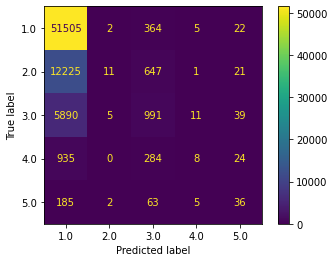

In [82]:
#------------------------Confusion Matrix---------------------------------------
from sklearn import metrics

from matplotlib import pyplot as plt
cm = metrics.confusion_matrix(y_test, y_pred, labels=trial_model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=trial_model.classes_)
cm_display.plot()
plt.show()

In [83]:
##------------------------Precision and Recall---------------------------------------
y_test_dummies = pd.get_dummies(y_test)
y_pred_dummies = pd.get_dummies(y_pred)

third = [1, 2, 3, 4, 5]

df_report = pd.DataFrame(metrics.classification_report(y_test_dummies, y_pred_dummies, target_names=third, output_dict=True))
df_report

,1,2,3,4,5,micro avg,macro avg,weighted avg,samples avg
precision,0.728089,0.550000,0.421882,0.266667,0.253521,0.717116,0.444032,0.657983,0.717116
recall,0.992427,0.000852,0.142878,0.006395,0.123711,0.717116,0.253253,0.717116,0.717116
f1-score,0.839952,0.001702,0.213463,0.012490,0.166282,0.717116,0.246778,0.616236,0.717116
support,51898.000000,12905.000000,6936.000000,1251.000000,291.000000,73281.000000,73281.000000,73281.000000,73281.000000


In [84]:
!pip install skl2onnx

!pip install onnxmltools


In [89]:
# Print number of features that our model has so our ONNX file can have the right number of features
model.n_features_in_

37

In [87]:
# ----Transferring to ONNX File 
#-----That's all folk! Please grade generously.
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
initial_type = [('float_input', FloatTensorType([None, 37]))]
onnx = convert_sklearn(model, initial_types=initial_type)
with open("finali.onnx", "wb") as f: 
  f.write(onnx.SerializeToString())